<ipython-input-5-e7a5fc318d2c>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)  # Fill numeric with median
<ipython-input-5-e7a5fc318d2c>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4375/4375 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9140 - loss: 0.2236 - val_accuracy: 0.9445 - val_loss: 0.1596
Epoch 2/50
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9440 - loss: 0.1599 - val_accuracy: 0.9495 - val_loss: 0.1493
Epoch 3/50
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9497 - loss: 0.1487 - val_accuracy: 0.9510 - val_loss: 0.1451
Epoch 4/50
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9511 - loss: 0.1455 - val_accuracy: 0.9547 - val_loss: 0.1401
Epoch 5/50
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9536 - loss: 0.1404 - val_accuracy: 0.9526 - val_loss: 0.1441
Epoch 6/50
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9538 - loss: 0.1412 - val_accuracy: 0.9549 - val_loss: 0.1397
Epoch 7/50
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9539 - loss: 0.1412 - val_accuracy: 0.9568 - val_loss: 0.1362
Epoch 8/50
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9557 - loss: 0.1382 - val

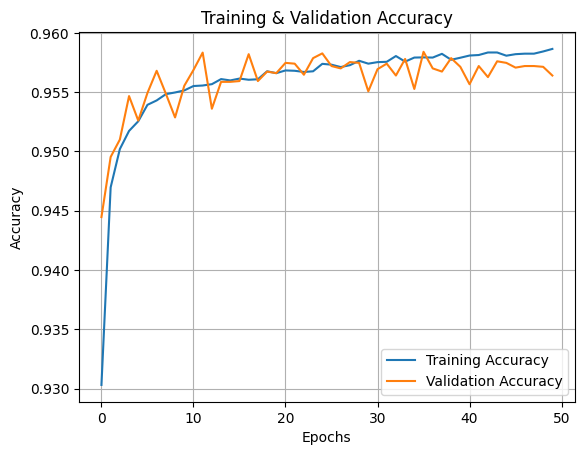

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("loan_eligibility_dataset new.csv")

# Handle missing values
for col in ["Credit_Score", "Monthly_Income", "Loan_Amount", "Interest_Rate", "Age", "Work_Experience"]:
    df[col].fillna(df[col].median(), inplace=True)  # Fill numeric with median

for col in ["Gender", "Marital_Status", "Job_Type"]:
    df[col].fillna(df[col].mode()[0], inplace=True)  # Fill categorical with mode

# Encode categorical features
encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_cols = ["Gender", "Marital_Status", "Job_Type"]
encoded_features = pd.DataFrame(encoder.fit_transform(df[categorical_cols]))
encoded_features.columns = encoder.get_feature_names_out(categorical_cols)

# Scale numerical features
scaler = StandardScaler()
numerical_cols = ["Credit_Score", "Monthly_Income", "Loan_Amount", "Interest_Rate", "Age", "Work_Experience"]
scaled_numerical = pd.DataFrame(scaler.fit_transform(df[numerical_cols]), columns=numerical_cols)

# Merge processed features
final_df = pd.concat([scaled_numerical, encoded_features], axis=1)
final_df["Loan_Approval_Status"] = df["Loan_Approval_Status"].map({"Approved": 1, "Rejected": 0})

# Split into train, validation, and test sets
X = final_df.drop(columns=["Loan_Approval_Status"])
y = final_df["Loan_Approval_Status"]
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Build DNN Model
def build_dnn(input_shape):
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train the model
dnn_all = build_dnn(X_train.shape[1])
history_all = dnn_all.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=16, verbose=1)

# Evaluate on test data
test_loss, test_acc = dnn_all.evaluate(X_test, y_test, verbose=0)
print(f"📌 DNN (All Features) Test Accuracy: {test_acc:.4f}")

# Plot Training vs. Validation Accuracy
plt.plot(history_all.history['accuracy'], label='Training Accuracy')
plt.plot(history_all.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.grid()
plt.show()

2188/2188 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step

📊 Evaluation on Training Data of DNN with Adam:
Accuracy  : 0.9587
Precision : 0.8969
Recall    : 0.9977
F1 Score  : 0.9446
ROC-AUC   : 0.9781
Confusion Matrix:
[[42478  2833]
 [   57 24632]]
TN: 42478, FP: 2833, FN: 57, TP: 24632


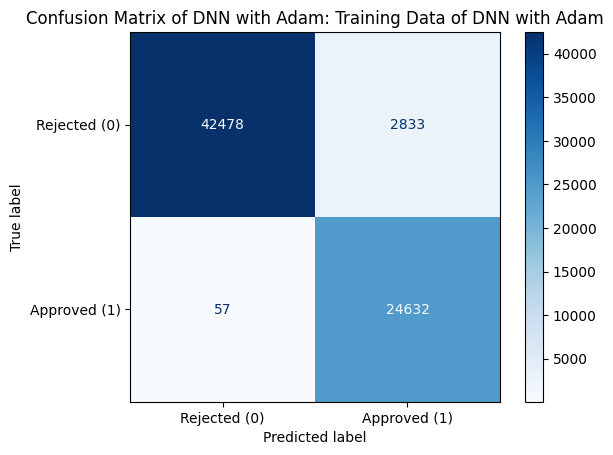

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

📊 Evaluation on Testing Data of DNN with Adam:
Accuracy  : 0.9571
Precision : 0.8951
Recall    : 0.9941
F1 Score  : 0.9420
ROC-AUC   : 0.9685
Confusion Matrix:
[[9127  613]
 [  31 5229]]
TN: 9127, FP: 613, FN: 31, TP: 5229


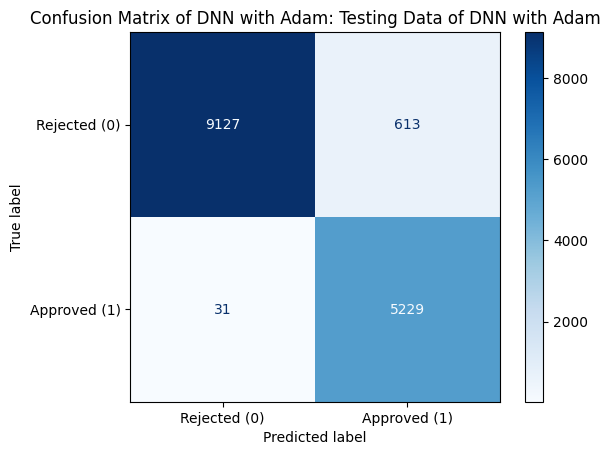

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay

# Function to calculate and print evaluation metrics
def evaluate_model(model, X, y_true, dataset_name="Dataset"):
    # Predict probabilities
    y_prob = model.predict(X)
    # Convert probabilities to class labels
    y_pred = (y_prob > 0.5).astype(int)

    # Metrics
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc = roc_auc_score(y_true, y_prob)

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()

    print(f"\n📊 Evaluation on {dataset_name}:")
    print(f"Accuracy  : {acc:.4f}")
    print(f"Precision : {prec:.4f}")
    print(f"Recall    : {rec:.4f}")
    print(f"F1 Score  : {f1:.4f}")
    print(f"ROC-AUC   : {roc:.4f}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")

    # Plot Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Rejected (0)", "Approved (1)"])
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"Confusion Matrix of DNN with Adam: {dataset_name}")
    plt.grid(False)
    plt.show()

# Evaluate on Training Data
evaluate_model(dnn_all, X_train, y_train, dataset_name="Training Data of DNN with Adam")

# Evaluate on Testing Data
evaluate_model(dnn_all, X_test, y_test, dataset_name="Testing Data of DNN with Adam")


469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


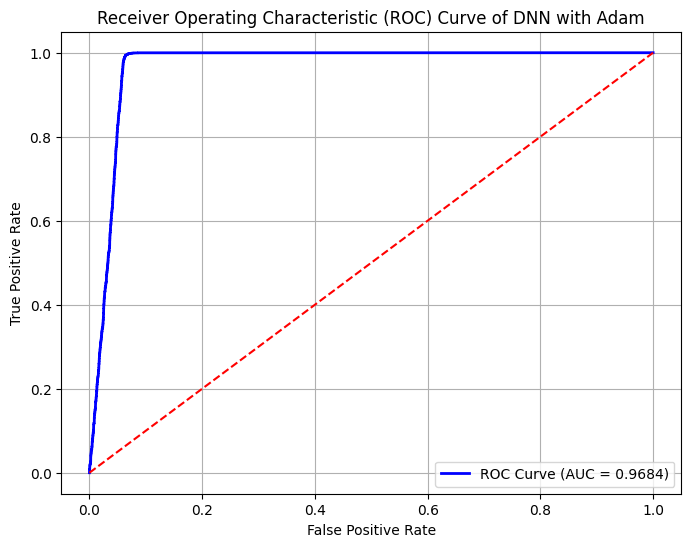

In [ ]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities on the test set
y_pred_probs = dnn_all.predict(X_test).ravel()  # Flatten to 1D array

# Compute False Positive Rate, True Positive Rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

# Compute AUC
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of DNN with Adam')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [ ]:
dnn_all.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,181 (39.77 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,788 (26.52 KB)

<ipython-input-7-b1346cfbe7a4>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)  # Fill numeric with median
<ipython-input-7-b1346cfbe7a4>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4375/4375 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.8630 - loss: 0.3540 - val_accuracy: 0.9305 - val_loss: 0.1981
Epoch 2/50
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - accuracy: 0.9282 - loss: 0.1934 - val_accuracy: 0.9359 - val_loss: 0.1787
Epoch 3/50
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9359 - loss: 0.1728 - val_accuracy: 0.9414 - val_loss: 0.1681
Epoch 4/50
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9406 - loss: 0.1669 - val_accuracy: 0.9383 - val_loss: 0.1629
Epoch 5/50
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9469 - loss: 0.1569 - val_accuracy: 0.9483 - val_loss: 0.1556
Epoch 6/50
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9506 - loss: 0.1514 - val_accuracy: 0.9477 - val_loss: 0.1539
Epoch 7/50
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9520 - loss: 0.1483 - val_accuracy: 0.9501 - val_loss: 0.1499
Epoch 8/50
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9526 - loss: 0.1465 - val

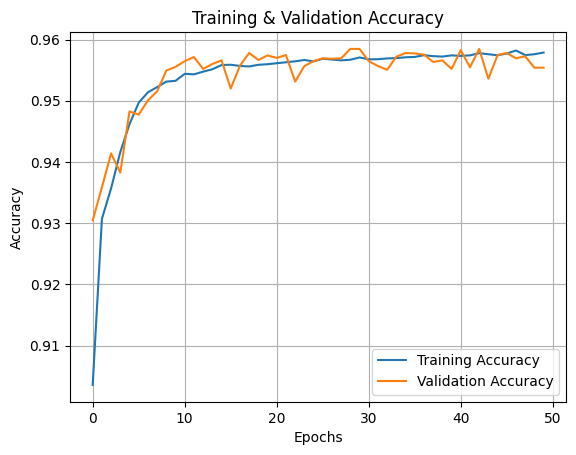

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("loan_eligibility_dataset new.csv")

# Handle missing values
for col in ["Credit_Score", "Monthly_Income", "Loan_Amount", "Interest_Rate", "Age", "Work_Experience"]:
    df[col].fillna(df[col].median(), inplace=True)  # Fill numeric with median

for col in ["Gender", "Marital_Status", "Job_Type"]:
    df[col].fillna(df[col].mode()[0], inplace=True)  # Fill categorical with mode

# Encode categorical features
encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_cols = ["Gender", "Marital_Status", "Job_Type"]
encoded_features = pd.DataFrame(encoder.fit_transform(df[categorical_cols]))
encoded_features.columns = encoder.get_feature_names_out(categorical_cols)

# Scale numerical features
scaler = StandardScaler()
numerical_cols = ["Credit_Score", "Monthly_Income", "Loan_Amount", "Interest_Rate", "Age", "Work_Experience"]
scaled_numerical = pd.DataFrame(scaler.fit_transform(df[numerical_cols]), columns=numerical_cols)

# Merge processed features
final_df = pd.concat([scaled_numerical, encoded_features], axis=1)
final_df["Loan_Approval_Status"] = df["Loan_Approval_Status"].map({"Approved": 1, "Rejected": 0})

# Split into train, validation, and test sets
X = final_df.drop(columns=["Loan_Approval_Status"])
y = final_df["Loan_Approval_Status"]
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Build DNN Model
def build_dnn(input_shape):
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Binary classification
    ])
    model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train the model
dnn_all = build_dnn(X_train.shape[1])
history_all = dnn_all.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=16, verbose=1)

# Evaluate on test data
test_loss, test_acc = dnn_all.evaluate(X_test, y_test, verbose=0)
print(f"📌 DNN (All Features) Test Accuracy: {test_acc:.4f}")

# Plot Training vs. Validation Accuracy
plt.plot(history_all.history['accuracy'], label='Training Accuracy')
plt.plot(history_all.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.grid()
plt.show()




2188/2188 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step

📊 Evaluation on Training Data of DNN with SGD:
Accuracy  : 0.9561
Precision : 0.9004
Recall    : 0.9846
F1 Score  : 0.9406
ROC-AUC   : 0.9753
Confusion Matrix:
[[42621  2690]
 [  381 24308]]
TN: 42621, FP: 2690, FN: 381, TP: 24308


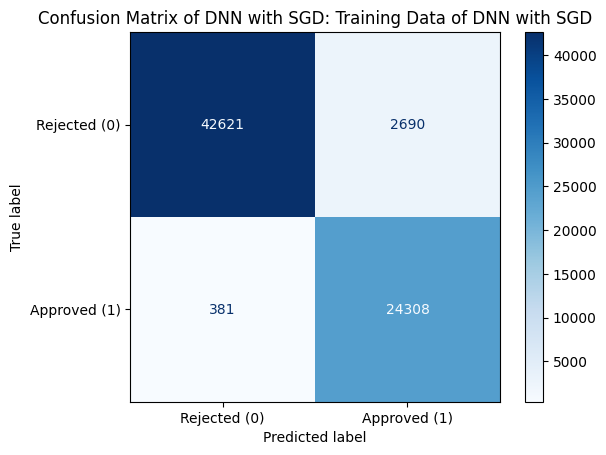

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

📊 Evaluation on Testing Data of DNN with SGD:
Accuracy  : 0.9561
Precision : 0.9010
Recall    : 0.9829
F1 Score  : 0.9402
ROC-AUC   : 0.9706
Confusion Matrix:
[[9172  568]
 [  90 5170]]
TN: 9172, FP: 568, FN: 90, TP: 5170


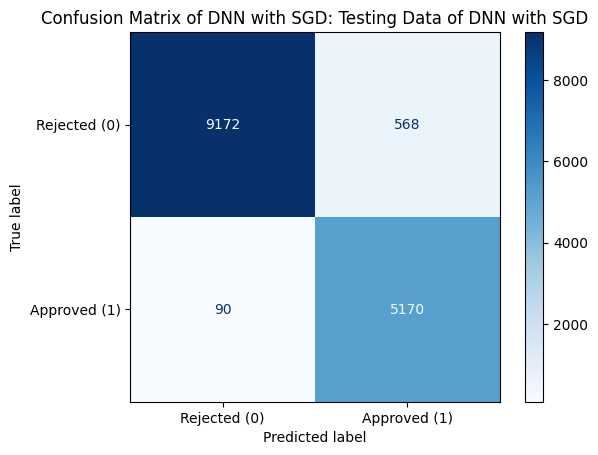

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay

# Function to calculate and print evaluation metrics
def evaluate_model(model, X, y_true, dataset_name="Dataset"):
    # Predict probabilities
    y_prob = model.predict(X)
    # Convert probabilities to class labels
    y_pred = (y_prob > 0.5).astype(int)

    # Metrics
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc = roc_auc_score(y_true, y_prob)

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()

    print(f"\n📊 Evaluation on {dataset_name}:")
    print(f"Accuracy  : {acc:.4f}")
    print(f"Precision : {prec:.4f}")
    print(f"Recall    : {rec:.4f}")
    print(f"F1 Score  : {f1:.4f}")
    print(f"ROC-AUC   : {roc:.4f}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")

    # Plot Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Rejected (0)", "Approved (1)"])
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"Confusion Matrix of DNN with SGD: {dataset_name}")
    plt.grid(False)
    plt.show()

# Evaluate on Training Data
evaluate_model(dnn_all, X_train, y_train, dataset_name="Training Data of DNN with SGD")

# Evaluate on Testing Data
evaluate_model(dnn_all, X_test, y_test, dataset_name="Testing Data of DNN with SGD")


In [ ]:
dnn_all.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,181 (39.77 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,788 (26.52 KB)

<ipython-input-9-5845977ecaca>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)  # Fill numeric with median
<ipython-input-9-5845977ecaca>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4375/4375 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.6835 - loss: 0.5367 - val_accuracy: 0.8694 - val_loss: 0.3407
Epoch 2/50
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.8833 - loss: 0.3147 - val_accuracy: 0.9103 - val_loss: 0.2642
Epoch 3/50
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.9095 - loss: 0.2539 - val_accuracy: 0.9161 - val_loss: 0.2386
Epoch 4/50
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9176 - loss: 0.2318 - val_accuracy: 0.9181 - val_loss: 0.2280
Epoch 5/50
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9178 - loss: 0.2264 - val_accuracy: 0.9197 - val_loss: 0.2222
Epoch 6/50
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9193 - loss: 0.2218 - val_accuracy: 0.9216 - val_loss: 0.2183
Epoch 7/50
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9209 - loss: 0.2156 - val_accuracy: 0.9226 - val_loss: 0.2153
Epoch 8/50
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9229 - loss: 0.2125 - val

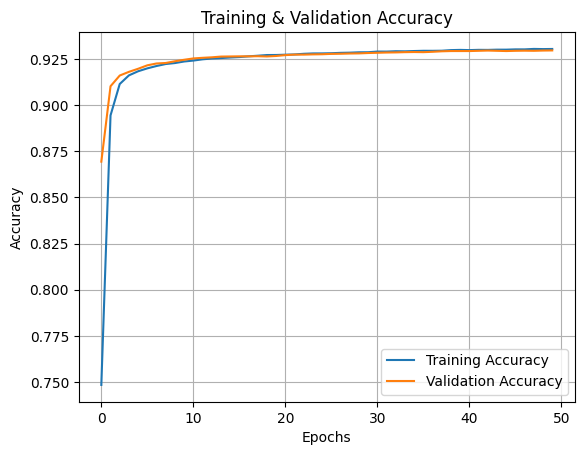

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("loan_eligibility_dataset new.csv")

# Handle missing values
for col in ["Credit_Score", "Monthly_Income", "Loan_Amount", "Interest_Rate", "Age", "Work_Experience"]:
    df[col].fillna(df[col].median(), inplace=True)  # Fill numeric with median

for col in ["Gender", "Marital_Status", "Job_Type"]:
    df[col].fillna(df[col].mode()[0], inplace=True)  # Fill categorical with mode

# Encode categorical features
encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_cols = ["Gender", "Marital_Status", "Job_Type"]
encoded_features = pd.DataFrame(encoder.fit_transform(df[categorical_cols]))
encoded_features.columns = encoder.get_feature_names_out(categorical_cols)

# Scale numerical features
scaler = StandardScaler()
numerical_cols = ["Credit_Score", "Monthly_Income", "Loan_Amount", "Interest_Rate", "Age", "Work_Experience"]
scaled_numerical = pd.DataFrame(scaler.fit_transform(df[numerical_cols]), columns=numerical_cols)

# Merge processed features
final_df = pd.concat([scaled_numerical, encoded_features], axis=1)
final_df["Loan_Approval_Status"] = df["Loan_Approval_Status"].map({"Approved": 1, "Rejected": 0})

# Split into train, validation, and test sets
X = final_df.drop(columns=["Loan_Approval_Status"])
y = final_df["Loan_Approval_Status"]
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Build DNN Model
def build_dnn(input_shape):
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Binary classification
    ])
    model.compile(optimizer='adagrad', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train the model
dnn_all = build_dnn(X_train.shape[1])
history_all = dnn_all.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=16, verbose=1)

# Evaluate on test data
test_loss, test_acc = dnn_all.evaluate(X_test, y_test, verbose=0)
print(f"📌 DNN (All Features) Test Accuracy: {test_acc:.4f}")

# Plot Training vs. Validation Accuracy
plt.plot(history_all.history['accuracy'], label='Training Accuracy')
plt.plot(history_all.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.grid()
plt.show()



2188/2188 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step

📊 Evaluation on Training Data of DNN with Adagrad:
Accuracy  : 0.9306
Precision : 0.8519
Recall    : 0.9721
F1 Score  : 0.9081
ROC-AUC   : 0.9637
Confusion Matrix:
[[41140  4171]
 [  689 24000]]
TN: 41140, FP: 4171, FN: 689, TP: 24000


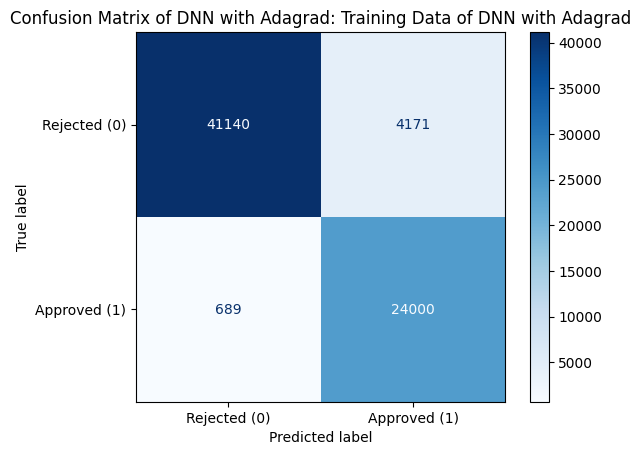

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

📊 Evaluation on Testing Data of DNN with Adagrad:
Accuracy  : 0.9326
Precision : 0.8547
Recall    : 0.9732
F1 Score  : 0.9101
ROC-AUC   : 0.9652
Confusion Matrix:
[[8870  870]
 [ 141 5119]]
TN: 8870, FP: 870, FN: 141, TP: 5119


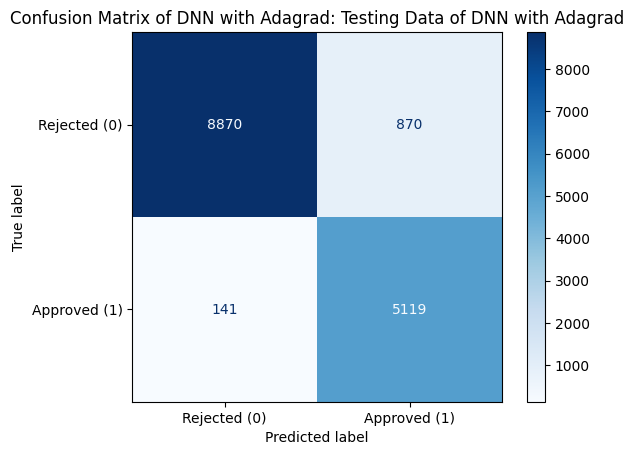

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay

# Function to calculate and print evaluation metrics
def evaluate_model(model, X, y_true, dataset_name="Dataset"):
    # Predict probabilities
    y_prob = model.predict(X)
    # Convert probabilities to class labels
    y_pred = (y_prob > 0.5).astype(int)

    # Metrics
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc = roc_auc_score(y_true, y_prob)

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()

    print(f"\n📊 Evaluation on {dataset_name}:")
    print(f"Accuracy  : {acc:.4f}")
    print(f"Precision : {prec:.4f}")
    print(f"Recall    : {rec:.4f}")
    print(f"F1 Score  : {f1:.4f}")
    print(f"ROC-AUC   : {roc:.4f}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")

    # Plot Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Rejected (0)", "Approved (1)"])
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"Confusion Matrix of DNN with Adagrad: {dataset_name}")
    plt.grid(False)
    plt.show()

# Evaluate on Training Data
evaluate_model(dnn_all, X_train, y_train, dataset_name="Training Data of DNN with Adagrad")

# Evaluate on Testing Data
evaluate_model(dnn_all, X_test, y_test, dataset_name="Testing Data of DNN with Adagrad")


<ipython-input-2-8ba6a54e1d7b>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)  # Fill numeric with median
<ipython-input-2-8ba6a54e1d7b>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4375/4375 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9105 - loss: 0.2286 - val_accuracy: 0.9352 - val_loss: 0.1725
Epoch 2/50
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.9370 - loss: 0.1705 - val_accuracy: 0.9466 - val_loss: 0.1562
Epoch 3/50
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.9448 - loss: 0.1573 - val_accuracy: 0.9485 - val_loss: 0.1512
Epoch 4/50
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9490 - loss: 0.1517 - val_accuracy: 0.9505 - val_loss: 0.1487
Epoch 5/50
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9502 - loss: 0.1485 - val_accuracy: 0.9554 - val_loss: 0.1396
Epoch 6/50
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9521 - loss: 0.1471 - val_accuracy: 0.9533 - val_loss: 0.1448
Epoch 7/50
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9531 - loss: 0.1464 - val_accuracy: 0.9559 - val_loss: 0.1384
Epoch 8/50
4375/4375 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9543 - loss: 0.1427 - val_a

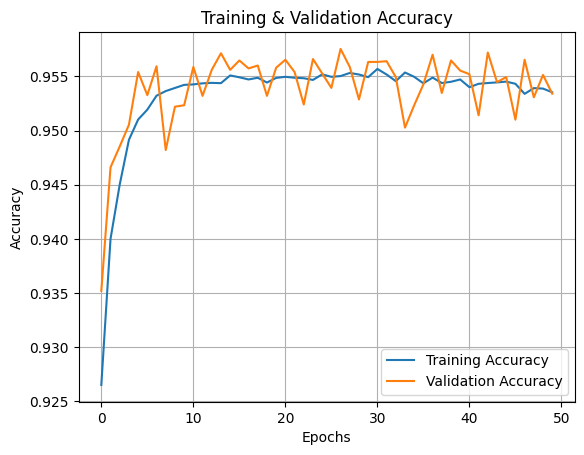

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv("loan_eligibility_dataset new.csv")

# Handle missing values
for col in ["Credit_Score", "Monthly_Income", "Loan_Amount", "Interest_Rate", "Age", "Work_Experience"]:
    df[col].fillna(df[col].median(), inplace=True)  # Fill numeric with median

for col in ["Gender", "Marital_Status", "Job_Type"]:
    df[col].fillna(df[col].mode()[0], inplace=True)  # Fill categorical with mode

# Encode categorical features
encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_cols = ["Gender", "Marital_Status", "Job_Type"]
encoded_features = pd.DataFrame(encoder.fit_transform(df[categorical_cols]))
encoded_features.columns = encoder.get_feature_names_out(categorical_cols)

# Scale numerical features
scaler = StandardScaler()
numerical_cols = ["Credit_Score", "Monthly_Income", "Loan_Amount", "Interest_Rate", "Age", "Work_Experience"]
scaled_numerical = pd.DataFrame(scaler.fit_transform(df[numerical_cols]), columns=numerical_cols)

# Merge processed features
final_df = pd.concat([scaled_numerical, encoded_features], axis=1)
final_df["Loan_Approval_Status"] = df["Loan_Approval_Status"].map({"Approved": 1, "Rejected": 0})

# Split into train, validation, and test sets
X = final_df.drop(columns=["Loan_Approval_Status"])
y = final_df["Loan_Approval_Status"]
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Build DNN Model
def build_dnn(input_shape):
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Binary classification
    ])
    model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train the model
dnn_all = build_dnn(X_train.shape[1])
history_all = dnn_all.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=16, verbose=1)

# Evaluate on test data
test_loss, test_acc = dnn_all.evaluate(X_test, y_test, verbose=0)
print(f"📌 DNN (All Features) Test Accuracy: {test_acc:.4f}")

# Plot Training vs. Validation Accuracy
plt.plot(history_all.history['accuracy'], label='Training Accuracy')
plt.plot(history_all.history['val_accuracy'], label='Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.grid()
plt.show()




2188/2188 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step

📊 Evaluation on Training Data of DNN with RMSprop:
Accuracy  : 0.9547
Precision : 0.8997
Recall    : 0.9808
F1 Score  : 0.9385
ROC-AUC   : 0.9704
Confusion Matrix:
[[42610  2701]
 [  473 24216]]
TN: 42610, FP: 2701, FN: 473, TP: 24216


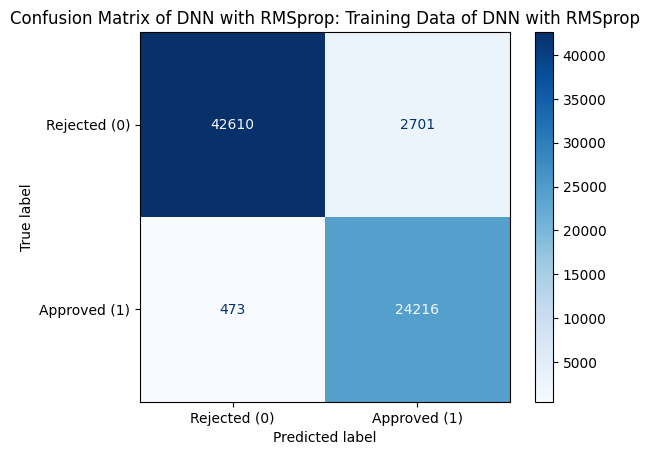

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

📊 Evaluation on Testing Data of DNN with RMSprop:
Accuracy  : 0.9539
Precision : 0.8983
Recall    : 0.9795
F1 Score  : 0.9372
ROC-AUC   : 0.9695
Confusion Matrix:
[[9157  583]
 [ 108 5152]]
TN: 9157, FP: 583, FN: 108, TP: 5152


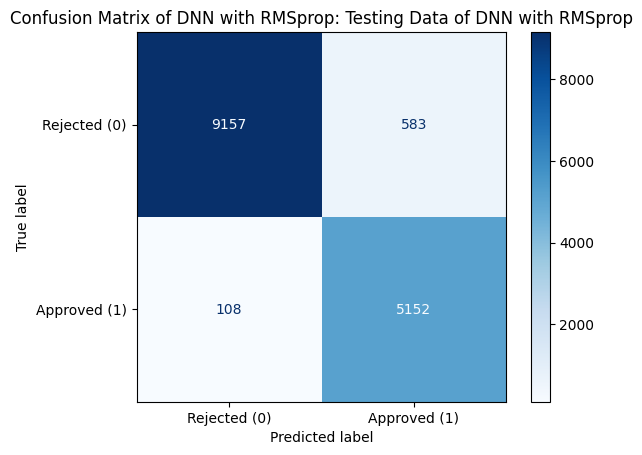

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay

# Function to calculate and print evaluation metrics
def evaluate_model(model, X, y_true, dataset_name="Dataset"):
    # Predict probabilities
    y_prob = model.predict(X)
    # Convert probabilities to class labels
    y_pred = (y_prob > 0.5).astype(int)

    # Metrics
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc = roc_auc_score(y_true, y_prob)

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()

    print(f"\n📊 Evaluation on {dataset_name}:")
    print(f"Accuracy  : {acc:.4f}")
    print(f"Precision : {prec:.4f}")
    print(f"Recall    : {rec:.4f}")
    print(f"F1 Score  : {f1:.4f}")
    print(f"ROC-AUC   : {roc:.4f}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")

    # Plot Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Rejected (0)", "Approved (1)"])
    disp.plot(cmap='Blues', values_format='d')
    plt.title(f"Confusion Matrix of DNN with RMSprop: {dataset_name}")
    plt.grid(False)
    plt.show()

# Evaluate on Training Data
evaluate_model(dnn_all, X_train, y_train, dataset_name="Training Data of DNN with RMSprop")

# Evaluate on Testing Data
evaluate_model(dnn_all, X_test, y_test, dataset_name="Testing Data of DNN with RMSprop")
